<a href="https://colab.research.google.com/github/Sujay2810/Projects/blob/main/MLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   Time      phi      psi  Residue per turn  Carbonyl angle   radius     rise  \
0  0.00 -62.5756 -44.2653          3.621725       10.764601  2.34480  1.50014   
1  0.01 -65.3280 -41.9958          3.638095       12.584130  2.32323  1.51532   
2  0.02 -66.7642 -40.1890          3.625532       13.759130  2.33026  1.52196   
3  0.03 -65.6869 -44.1324          3.722688       11.940036  2.37074  1.45852   
4  0.04 -66.5707 -41.4596          3.662044       13.228659  2.31210  1.52646   

       hb3      hb4      hb5  len-ahx    twist  IIIbh10-hbond  \
0  3.83439  3.23622  4.52014  14.3123  98.5442             12   
1  3.86462  3.33003  4.54045  14.4349  99.5189             12   
2  3.83156  3.31645  4.63795  14.5536  99.7213             12   
3  3.88694  3.15429  4.31240  14.1016  98.2808             14   
4  3.94989  3.26059  4.48441  14.5373  99.8403             13   

   IIIbh10-MC-hbond-MG114  IIIbh10-SC-hbond-MG114  
0                      11                

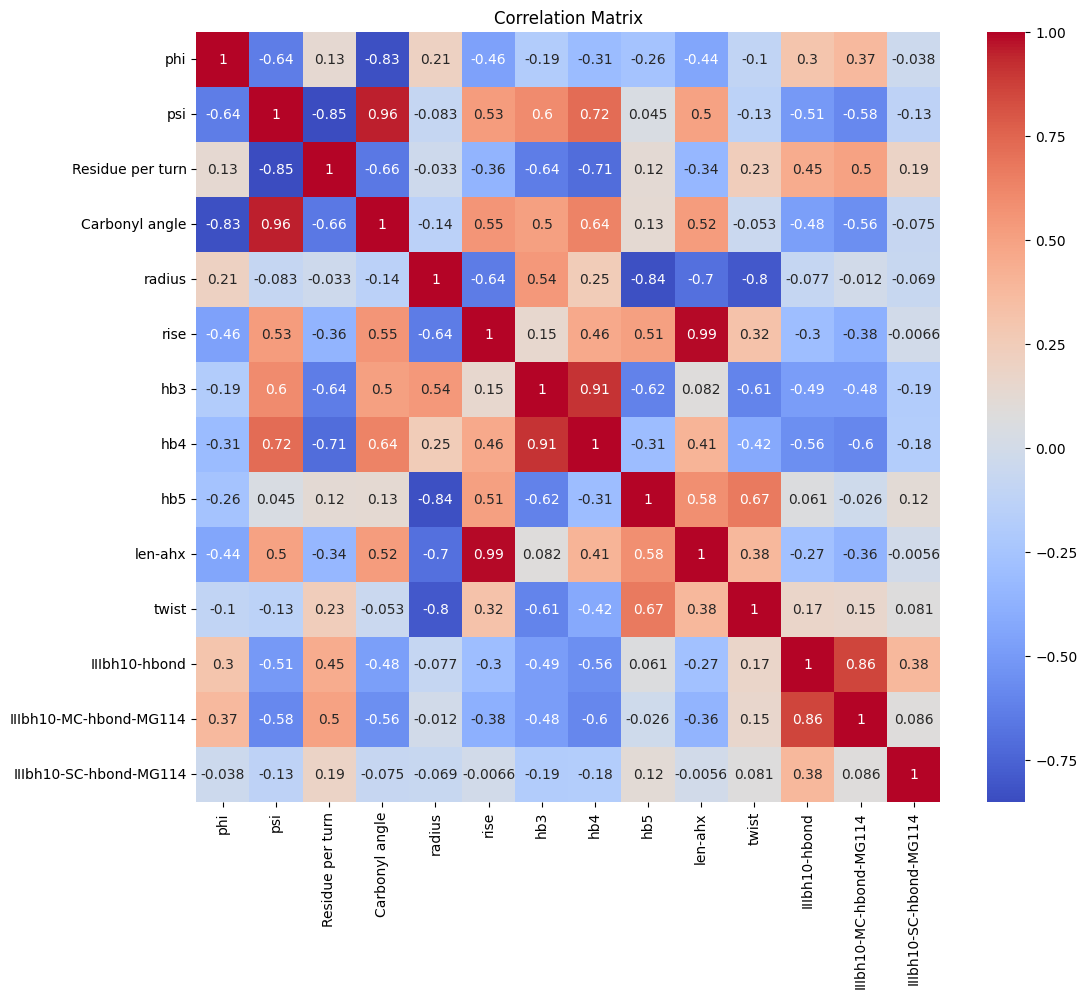


Training set size: (16000, 14)
Testing set size: (4001, 14)

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0040
R² Score: 0.9995


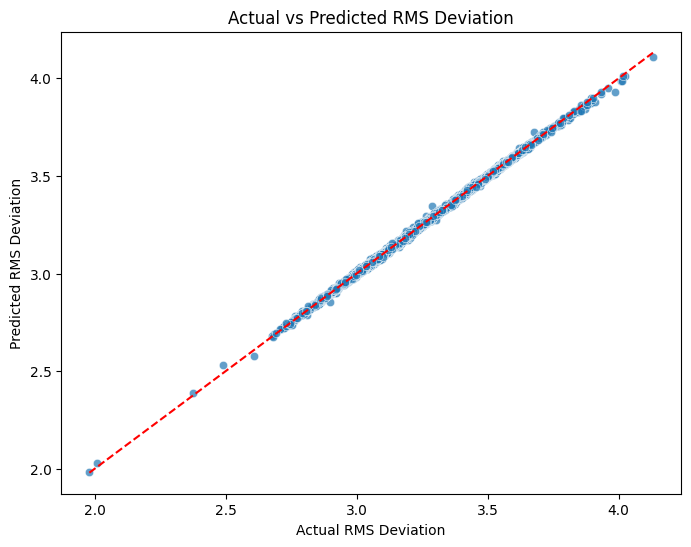

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer


# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading and Exploration
data = pd.read_csv('helix.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# 2. Data Preprocessing

# a. Handling Missing Values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify imputation
print("\nMissing Values After Imputation:")
print(data_imputed.isnull().sum())


# 3. Feature Selection

# Define the target variable
target = 'Residue per turn'

# Ensure the target column exists
if target not in data_imputed.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset.")

# Define feature variables (X) and target variable (y)
X = data_imputed.drop([target], axis=1)
y = data_imputed[target]

#Examine correlation between features and target
data_without_time = data_imputed.drop(columns=['Time'])
plt.figure(figsize=(12, 10))
correlation_matrix = data_without_time.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 4. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# 5. Data Scaling

# Scaling is crucial for neural networks


scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally, scale the target variable
# Depending on the distribution, scaling might help
# Here, we'll scale the target as well
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# 6. Model Definition and Training

# Define the MLP Regressor


mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=100,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

# Train the model
mlp.fit(X_train_scaled, y_train_scaled)

# 7. Evaluation

# Make predictions on test set
y_pred_scaled = mlp.predict(X_test_scaled)

# Inverse transform to get original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = y_test.values

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred, alpha=0.7)
plt.xlabel('Actual RMS Deviation')
plt.ylabel('Predicted RMS Deviation')
plt.title('Actual vs Predicted RMS Deviation')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--')
plt.show()





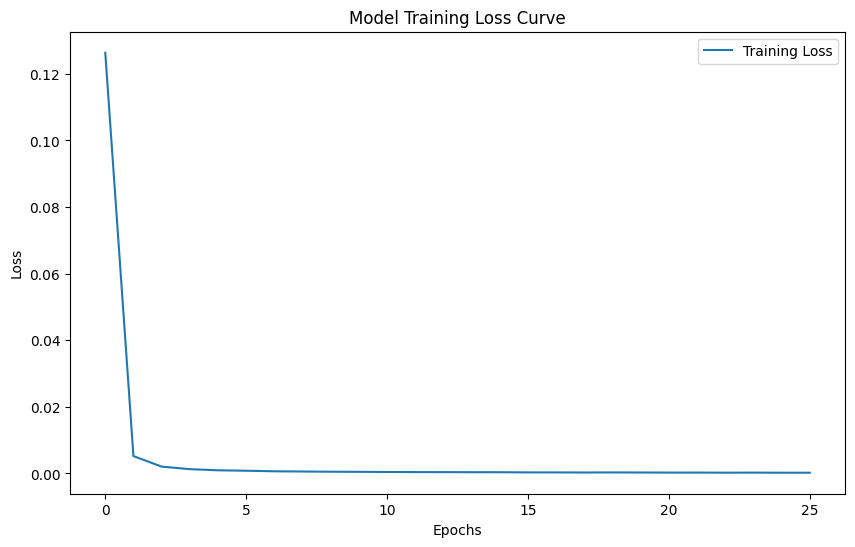

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss Curve')
plt.legend()
plt.show()


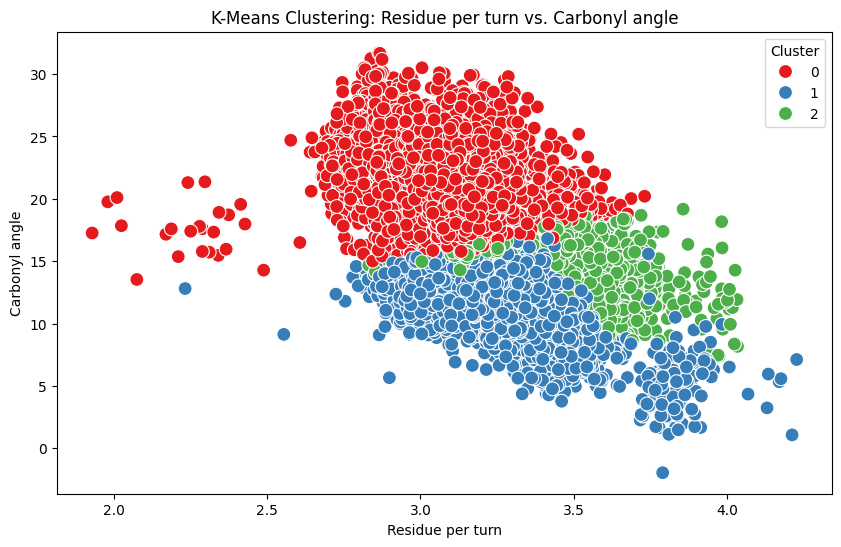

Cluster Centers:
[[  3.09183636  20.58014505   1.57365133  96.58978944   2.3813365
   14.81690765 -68.30518641 -22.90398608]
 [  3.29328335  10.66501584   1.38912842  93.12639005   2.53207501
   13.39089681 -57.59365129 -39.55820758]
 [  3.50592823  13.52116736   1.50580402  99.74282922   2.31779855
   14.34194521 -64.67165236 -38.75323044]]


In [ ]:
from sklearn.cluster import KMeans

columns_for_clustering = ['Residue per turn', 'Carbonyl angle', 'rise', 'twist', 'radius','len-ahx','phi','psi']

# Filter dataset for the columns we need
X = data[columns_for_clustering]

# Apply K-means clustering with 3 clusters (this can be adjusted based on elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (for example, Residue per turn vs. Carbonyl angle)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Residue per turn'], y=data['Carbonyl angle'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('K-Means Clustering: Residue per turn vs. Carbonyl angle')
plt.show()

# You can also check the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


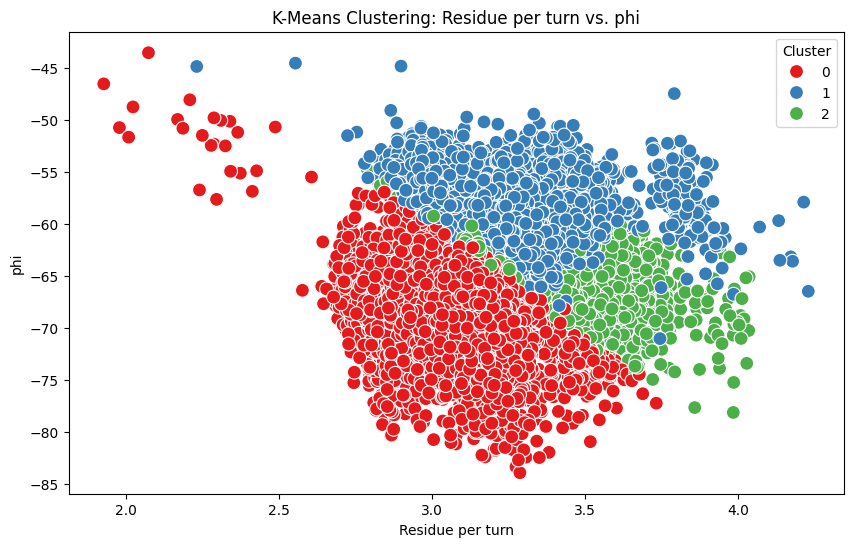

Cluster Centers:
[[  3.09183636  20.58014505   1.57365133  96.58978944   2.3813365
   14.81690765 -68.30518641 -22.90398608]
 [  3.29328335  10.66501584   1.38912842  93.12639005   2.53207501
   13.39089681 -57.59365129 -39.55820758]
 [  3.50592823  13.52116736   1.50580402  99.74282922   2.31779855
   14.34194521 -64.67165236 -38.75323044]]


In [ ]:
from sklearn.cluster import KMeans

columns_for_clustering = ['Residue per turn', 'Carbonyl angle', 'rise', 'twist', 'radius','len-ahx','phi','psi']

# Filter dataset for the columns we need
X = data[columns_for_clustering]

# Apply K-means clustering with 3 clusters (this can be adjusted based on elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (for example, Residue per turn vs. phi)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Residue per turn'], y=data['phi'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('K-Means Clustering: Residue per turn vs. phi')
plt.show()

# You can also check the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


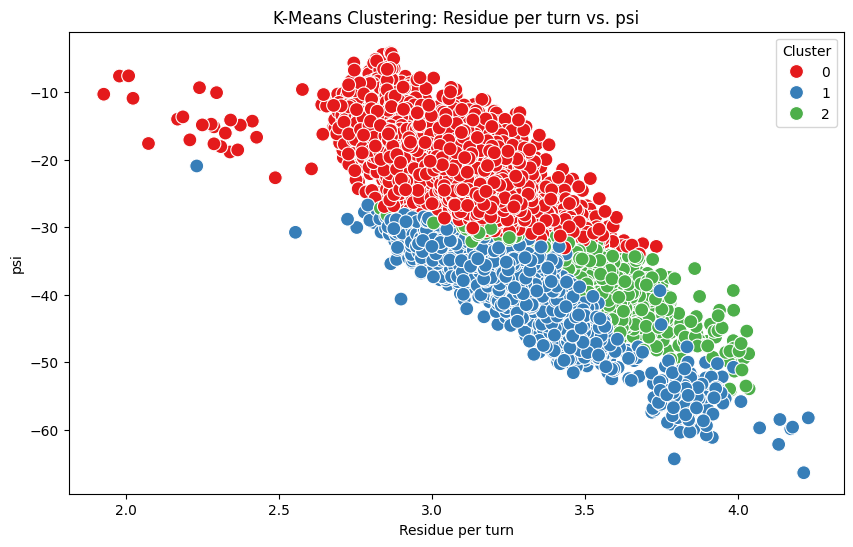

Cluster Centers:
[[  3.09183636  20.58014505   1.57365133  96.58978944   2.3813365
   14.81690765 -68.30518641 -22.90398608]
 [  3.29328335  10.66501584   1.38912842  93.12639005   2.53207501
   13.39089681 -57.59365129 -39.55820758]
 [  3.50592823  13.52116736   1.50580402  99.74282922   2.31779855
   14.34194521 -64.67165236 -38.75323044]]


In [ ]:
from sklearn.cluster import KMeans

columns_for_clustering = ['Residue per turn', 'Carbonyl angle', 'rise', 'twist', 'radius','len-ahx','phi','psi']

# Filter dataset for the columns we need
X = data[columns_for_clustering]

# Apply K-means clustering with 3 clusters (this can be adjusted based on elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (for example, Residue per turn vs. psi)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Residue per turn'], y=data['psi'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('K-Means Clustering: Residue per turn vs. psi')
plt.show()

# You can also check the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Summary:
         Residue per turn  Carbonyl angle    radius      rise      twist
Cluster                                                                 
0                3.091971       20.578508  2.381278  1.573662  96.591242
1                3.292674       10.667916  2.532381  1.388906  93.117504
2                3.506186       13.514880  2.317837  1.505765  99.742683


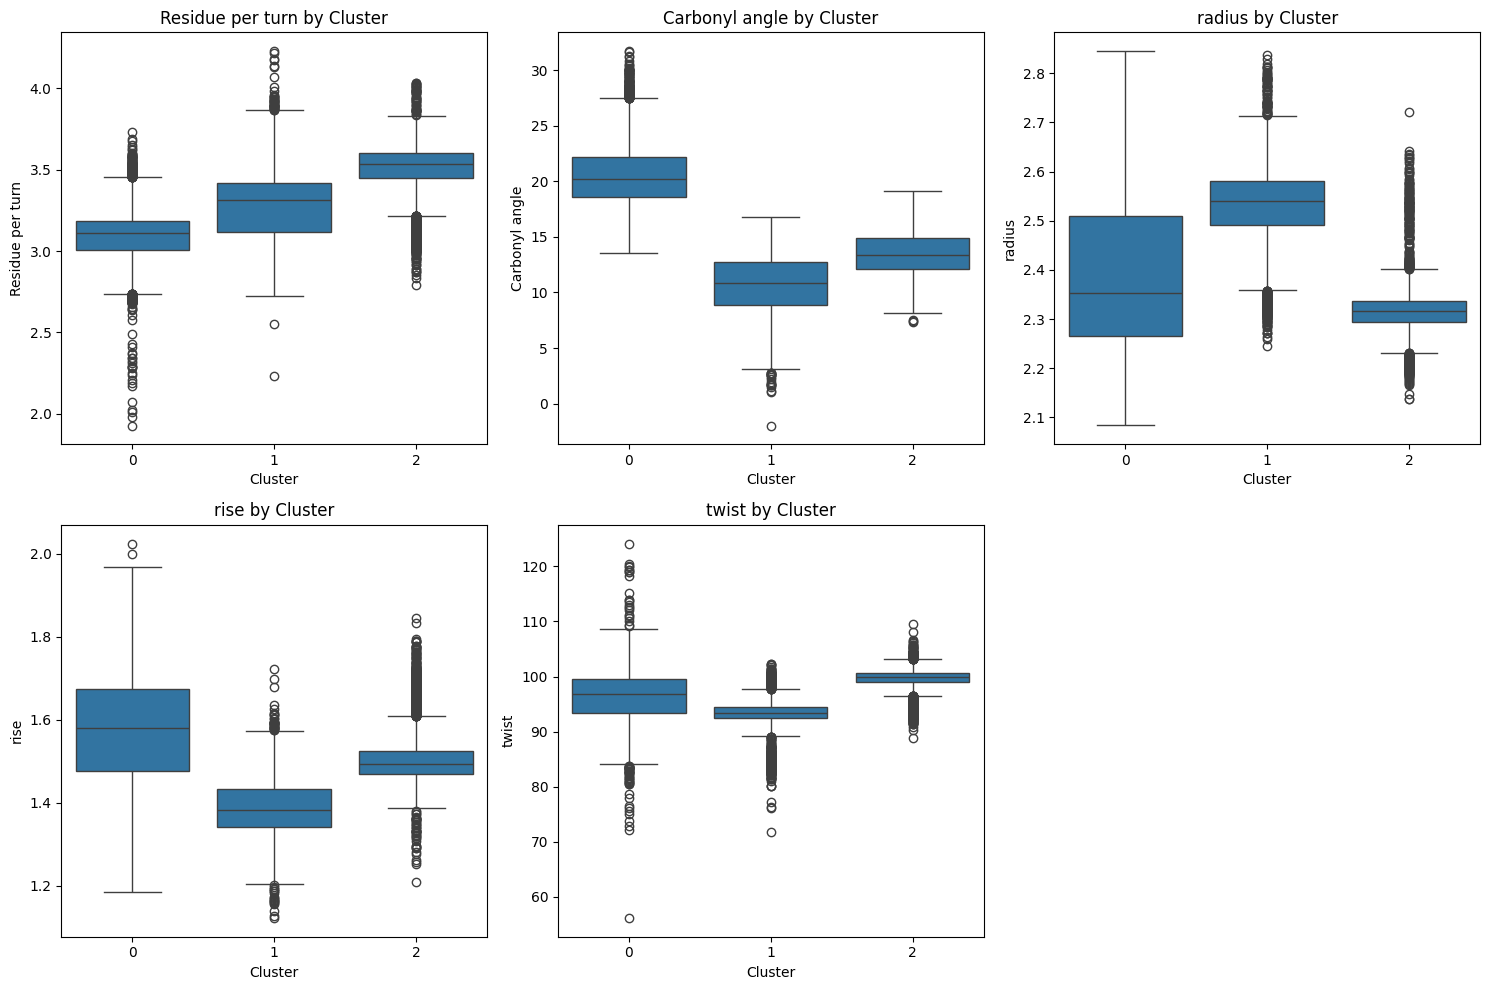

In [ ]:
# Assuming 'Cluster' column is already added after K-Means clustering
# Create a dataframe for comparing features across clusters
columns_of_interest = ['Residue per turn', 'Carbonyl angle', 'radius', 'rise', 'twist', 'Cluster']
cluster_data = data[columns_of_interest]

# Group by cluster and calculate the mean of each feature
cluster_summary = cluster_data.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

# Plot each feature to compare across clusters
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_of_interest[:-1]):  # Exclude 'Cluster' for plotting
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Cluster', y=col, data=cluster_data)
    plt.title(f'{col} by Cluster')

plt.tight_layout()
plt.show()
